In [1]:
import numpy as np

Write a NumPy program to compute the multiplication of two given matrixes.

In [6]:
a = [[1,2], [4,5]]
b = [[4,5] , [2,3]]
c = np.dot( a , b)
print(c)


[[ 8 11]
 [26 35]]


In [9]:
a = [1,2,3,4]
b = [4,5,6,7]

c = np.dot(a , b)
c


60

Write a NumPy program to compute the outer product of two given vectors.

In [10]:
a = [[1,2]  ,[3,4]]
b = [[3,4] , [6,7]]
c = np.outer(a , b)
c

array([[ 3,  4,  6,  7],
       [ 6,  8, 12, 14],
       [ 9, 12, 18, 21],
       [12, 16, 24, 28]])

Write a NumPy program to compute the cross product of two given vectors.

In [12]:
a = [1,2] 
b = [3,4]

c = np.cross(a,b)
c

array(-2)

Write a NumPy program to compute the determinant of a given square array.

In [13]:
import numpy as np
from numpy import linalg as LA

a = np.array([[1, 0], [1, 2]])
print(np.linalg.det(a))

2.0


Ridge regression using NUMPY


In [37]:
import numpy as np 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
coeff

array([ 150.92721647,   40.22980953,  -61.68895989,  273.28957886,
        197.33039238,   -1.61646667,  -19.12539101, -142.98112377,
        107.37594422,  195.22479197,   84.33273189])

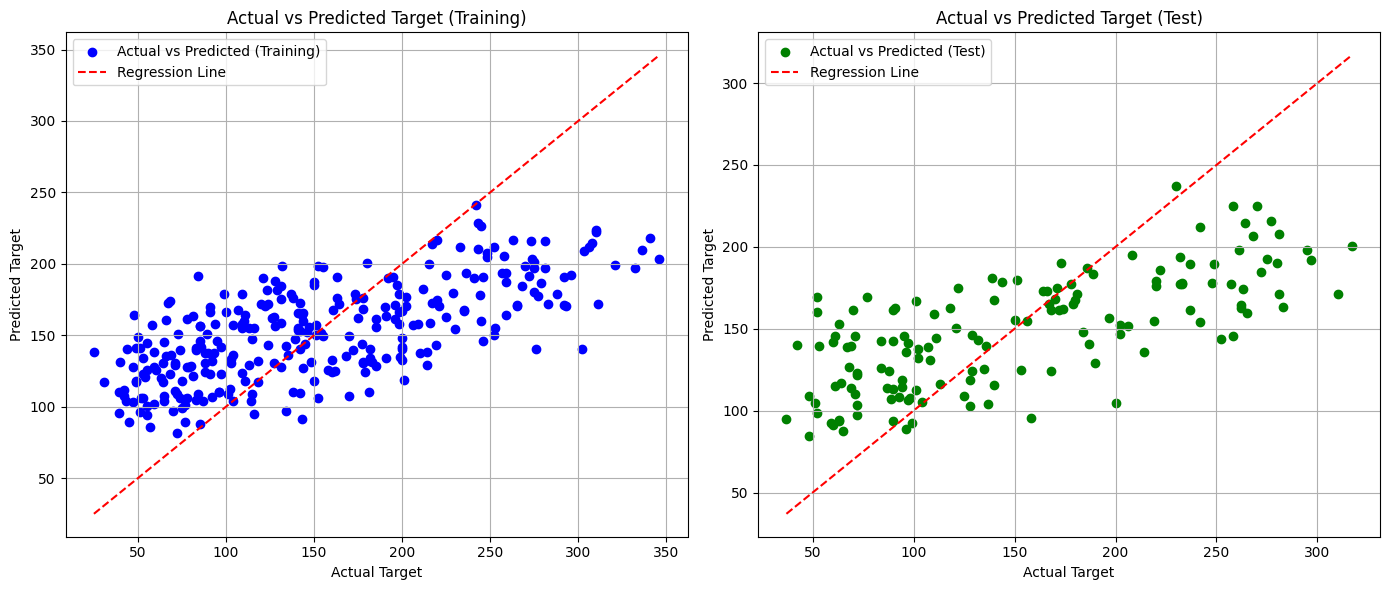

In [40]:
import matplotlib.pyplot as plt
diabetes = load_diabetes()

X , y = diabetes.data  , diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
def ridge_regression(X , y , alpha):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    iden = np.identity(X.shape[1])
    iden[0][0] = 0
    alp = 1
    ridge = np.linalg.inv(X.T.dot(X)+ alp  * iden).dot(X.T).dot(y)

    return ridge
coeff = ridge_regression(X_train , y_train , alpha = 0.1)
# Calculate predicted values for training data
y_pred_train = np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)), coeff)

# Calculate predicted values for test data
y_pred_test = np.dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), coeff)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for training data
axs[0].scatter(y_train, y_pred_train, color='blue', label='Actual vs Predicted (Training)')
axs[0].set_xlabel('Actual Target')
axs[0].set_ylabel('Predicted Target')
axs[0].set_title('Actual vs Predicted Target (Training)')
axs[0].grid(True)

# Plot regression line for training data
x_values_train = np.linspace(min(y_train), max(y_train), 100)
y_values_train = x_values_train  # For a simple linear regression, the line has the form y = x
axs[0].plot(x_values_train, y_values_train, color='red', linestyle='--', label='Regression Line')
axs[0].legend()

# Plot for test data
axs[1].scatter(y_test, y_pred_test, color='green', label='Actual vs Predicted (Test)')
axs[1].set_xlabel('Actual Target')
axs[1].set_ylabel('Predicted Target')
axs[1].set_title('Actual vs Predicted Target (Test)')
axs[1].grid(True)

# Plot regression line for test data
x_values_test = np.linspace(min(y_test), max(y_test), 100)
y_values_test = x_values_test  # For a simple linear regression, the line has the form y = x
axs[1].plot(x_values_test, y_values_test, color='red', linestyle='--', label='Regression Line')
axs[1].legend()

plt.tight_layout()
plt.show()


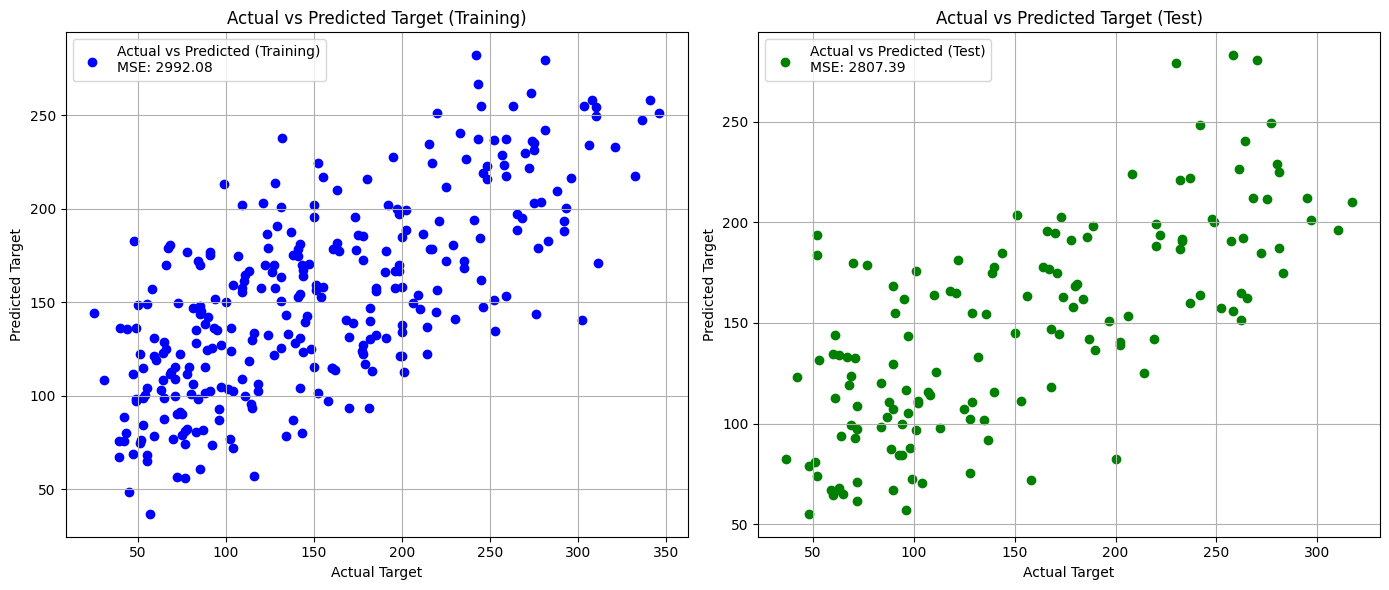

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def ridge_regression(X, y, alpha):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    iden = np.identity(X.shape[1])
    iden[0][0] = 0
    ridge = np.linalg.inv(X.T.dot(X) + alpha * iden).dot(X.T).dot(y)
    return ridge

# Perform ridge regression with alpha = 0.1
coeff = ridge_regression(X_train, y_train, alpha=0.1)

# Calculate predicted values for training and test data
y_pred_train = np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)), coeff)
y_pred_test = np.dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), coeff)

# Calculate mean squared error for training and test data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plot scatter plots and regression lines for training and test data
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for training data
axs[0].scatter(y_train, y_pred_train, color='blue', label=f'Actual vs Predicted (Training)\nMSE: {mse_train:.2f}')
axs[0].set_xlabel('Actual Target')
axs[0].set_ylabel('Predicted Target')
axs[0].set_title('Actual vs Predicted Target (Training)')
axs[0].grid(True)
axs[0].legend()

# Plot for test data
axs[1].scatter(y_test, y_pred_test, color='green', label=f'Actual vs Predicted (Test)\nMSE: {mse_test:.2f}')
axs[1].set_xlabel('Actual Target')
axs[1].set_ylabel('Predicted Target')
axs[1].set_title('Actual vs Predicted Target (Test)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


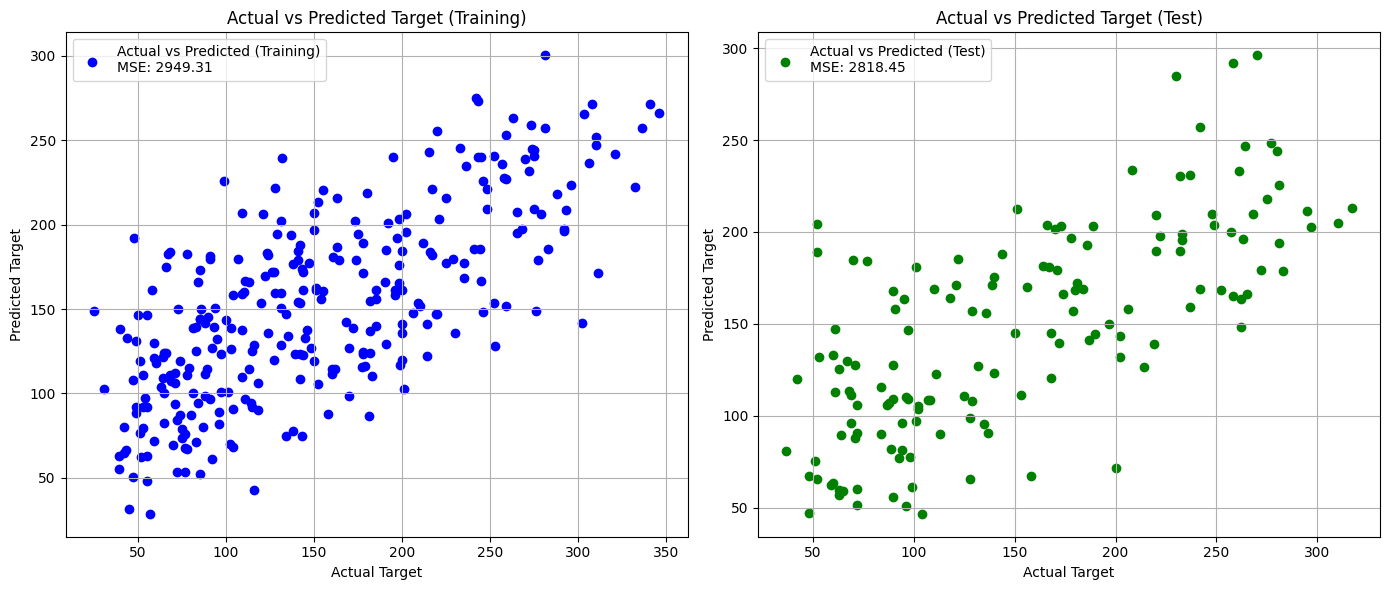

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to the feature matrix to represent the intercept term
X_train_scaled_with_intercept = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled_with_intercept = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

def ridge_regression(X, y, alpha):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    iden = np.identity(X.shape[1])
    iden[0][0] = 0
    ridge = np.linalg.inv(X.T.dot(X) + alpha * iden).dot(X.T).dot(y)
    return ridge

# Perform ridge regression with alpha = 0.1
coeff = ridge_regression(X_train_scaled_with_intercept, y_train, alpha=0.1)

# Calculate predicted values for training and test data
y_pred_train = np.dot(np.hstack((np.ones((X_train_scaled_with_intercept.shape[0], 1)), X_train_scaled_with_intercept)), coeff)
y_pred_test = np.dot(np.hstack((np.ones((X_test_scaled_with_intercept.shape[0], 1)), X_test_scaled_with_intercept)), coeff)

# Calculate mean squared error for training and test data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plot scatter plots and regression lines for training and test data
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for training data
axs[0].scatter(y_train, y_pred_train, color='blue', label=f'Actual vs Predicted (Training)\nMSE: {mse_train:.2f}')
axs[0].set_xlabel('Actual Target')
axs[0].set_ylabel('Predicted Target')
axs[0].set_title('Actual vs Predicted Target (Training)')
axs[0].grid(True)
axs[0].legend()

# Plot for test data
axs[1].scatter(y_test, y_pred_test, color='green', label=f'Actual vs Predicted (Test)\nMSE: {mse_test:.2f}')
axs[1].set_xlabel('Actual Target')
axs[1].set_ylabel('Predicted Target')
axs[1].set_title('Actual vs Predicted Target (Test)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()
